<h2 style="color: green">Identifying the best tariff plan</h2>
    
Customers of the federal mobile operator **Megaline** are offered two tariff plans: ***Smart and Ultra.***

To adjust the advertising budget, the commercial department wants to understand which tariff is more profitable.

We need to do a preliminary analysis of the plans on a small sample of customers. We have data on 500 Megaline users: who they are, where they come from, which tariff they use, and how many calls and messages each of them sent in 2018.

**Purpose of the project** - to analyze customer behavior and draw a conclusion - which tariff is better.

**Progress of the study.**

The research will be conducted in 4 steps:
 
  1. Study of general data information
  2. Data Preparation
  3. Data analysis and revenue calculation
  4. Hypotheses testing
    
<img src="https://img.freepik.com/free-vector/hands-holding-touching-mobile-phones-displays-using-apps-online-set_74855-16142.jpg" width="900" height="800" alt="Mobile Phones with opened apps" />

# Description of tariffs

**Tariff "Smart"**
 - Monthly fee: 550 rubles
 - Includes 500 minutes of talk time, 50 messages and 15 Gb of Internet traffic
 - Cost of services on top of the tariff package:
   * One minute of talk time - 3 RUB. "Megaline" always rounds up the number of used minutes and megabytes. If the user has spoken for only 1 second, the whole minute is counted in the tariff.
   * Message - 3 RUB.
   * 1 Gb of Internet traffic - 200 RUB.

**Tariff "Ultra"**
  - Monthly fee: 1950 rubles.
  - Includes 3000 minutes of talk time, 1000 messages and 30 Gb of Internet traffic
  - Cost of services on top of the tariff package:
    * One minute of talk time - 1 RUB;
    * Message - 1 RUB;
    * 1 Gb of Internet traffic: 150 RUB.

In [1]:
# library loading

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# setting parameters

sns.set(style="whitegrid")

## Study of general data information

In [3]:
# reading files

calls = pd.read_csv("./calls.csv")
sessions= pd.read_csv("./internet.csv")
messages = pd.read_csv("./messages.csv")
tariffs = pd.read_csv("./tariffs.csv")
users = pd.read_csv("./users.csv")

To avoid duplicating code, we will write a function to output general information about our records.

In [4]:
def general_info(df):
    display(df.head())
    df.info()

In [5]:
# function call for dataset "calls"

general_info(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


There are 202607 observations in the calls data without any omissions. The `call_date` column has the wrong data type (object instead of datetime). There is only 1 numeric column in the table (`duration`), let's look at the distribution of the data in it below.

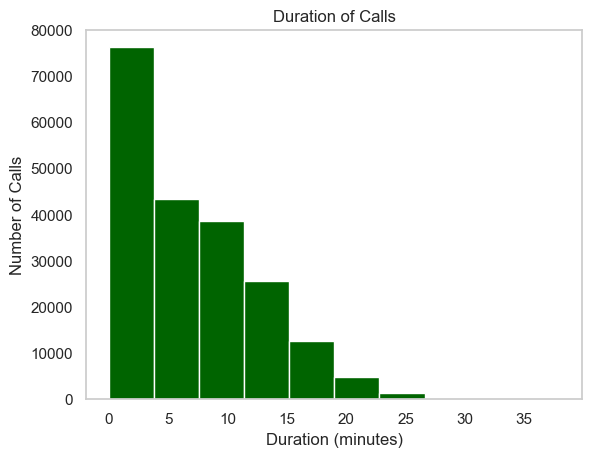

In [6]:
calls['duration'].hist(color='darkgreen')
plt.title('Duration of Calls')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Calls')
plt.grid(False)
plt.show()

According to provided data most calls have a duration of zero (zeros indicate missed calls). The most common call duration is up to 4 minutes. As the minutes increase, the number of such prolonged calls decreases.

In [7]:
# function call for dataset "sessions"

general_info(sessions)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


We have similar situation in the Internet session data: no gaps, `session_date` column has incorrect data type (object instead of datetime), and there is 1 numeric column (`mb_used`) - see below for data allocation in it.

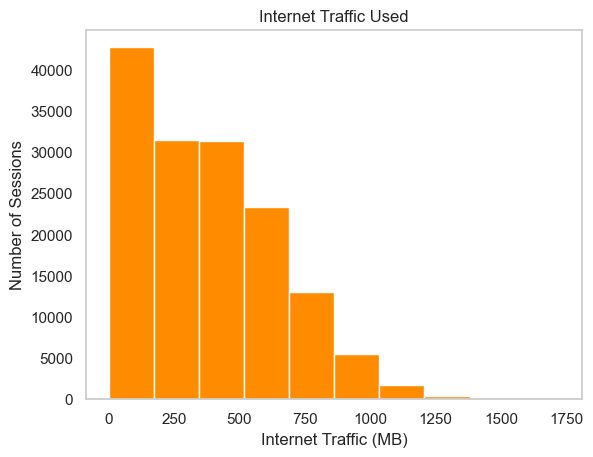

In [8]:
sessions['mb_used'].hist(color='darkorange')
plt.title('Internet Traffic Used')
plt.xlabel('Internet Traffic (MB)')
plt.ylabel('Number of Sessions')
plt.grid(False)
plt.show()

We use this graph to look at the data. It is not informative for us. We will provide the analysis of the number of megabytes used per month for each user, including a breakdown by tariff, in the later steps.

In [9]:
# function call for dataset "messages"

general_info(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


The `message_date` column in the message data has the wrong data type.

In [10]:
# function call for dataset "tariffs"

general_info(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


The tariff information looks correct.

In [11]:
# function call for dataset "users"

general_info(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Gaps in the `churn_date` column mean that the tariff was still valid at the time the data was collected.

### Data preparation

At first let's remove the column `Unnamed: 0` from the `sessions` dataframe. A column with this name appears when the data is stored with an index (`df.to_csv(..., index=column)`). It is not needed now.

In [12]:
sessions = sessions.drop(columns = ['Unnamed: 0'],axis = 1)

In [13]:
# do the check

sessions.columns.to_list()

['id', 'mb_used', 'session_date', 'user_id']

Let's convert the date columns to the correct data type:

In [14]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
sessions['session_date'] = pd.to_datetime(sessions['session_date'])

Let's round up the fractional values in the `duration` column for convenience:

In [15]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

We will now add a `month` column to the `calls`, `messages` and `sessions` dataframes. This will allow us to conveniently group data by month and perform analysis by time period.

In [16]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
sessions['month'] = sessions['session_date'].dt.month

Now let's calculate the following metrics for each user per month:
   * **Number of calls made** - allows us to evaluate user activity in different time periods and determine the most popular months for making calls.
   * **Number of minutes spent on calls** - this will help us evaluate the use of communication services and determine which tariff plan is more profitable for our users.
   * **Number of messages sent** - this allows us to evaluate the activity of users in using the service and to determine which tariff plan is preferred by customers.
   * **Number of megabytes spent** - this will help to determine the level of Internet service usage and to determine which tariff plan is more beneficial for our clients.

In [17]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

Let's combine all the values calculated above into one dataframe `user_behavior`.
For each user/month pair we will have information about the rate, number of calls, messages, and megabytes used.

In [18]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Let's check the gaps in the `user_behavior` table after merge:

In [19]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

The data contains gaps in the columns `calls` (40 users who did not make a single call during the whole time), `messages` (497 users who did not send a single message) and `mb_used` (11 users who never accessed the Internet). Let's fill the resulting gaps in the data with zeros.

In [20]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Let's add the tariff information:

In [21]:
# rename the tariff_name column to a simpler "tariff"

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [22]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

### Revenue Calculation

Now we are going to count the number of spoken minutes, messages and megabytes exceeding the included ones in the plan:

In [23]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Now let's convert the extra consumed megabytes to gigabytes and save them in the `paid_gb` column:

In [24]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Now we will calculate the revenue for minutes of talk time, messages, and the Internet access:

In [25]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

In the next step we will calculate the monthly revenue from each user. It will be stored in the `total_cost` column:

In [26]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

The `stats_df` dataframe will store the main characteristics for each month-tariff pair:

In [27]:
# Store statistical metrics for each month/rate pair
# in a table stats_df (mean, standard deviation, median)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


### Data analysis

We will use two types of histograms for the analysis:

**barplot** - to display the averages of the data by tariff type and month. This allows us to see how the average changes over time and by tariff type.

**hist** - to display the distribution of the data as a whole by each of the tariffs. It allows us to see how the data is distributed within each tariff.

* Distribution of an average number of calls by tariff type and month.

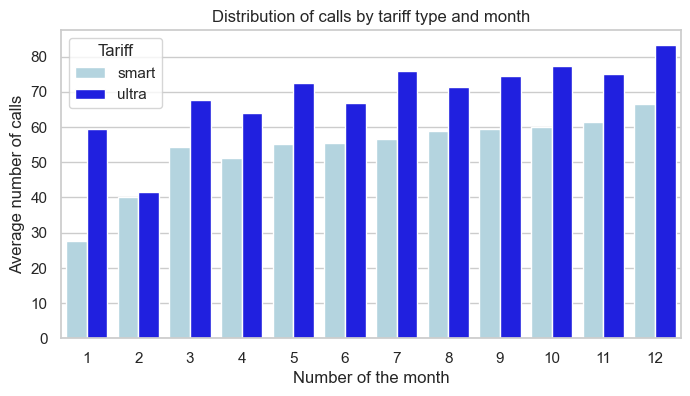

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

plt.title('Distribution of calls by tariff type and month')
plt.xlabel('Number of the month')
plt.ylabel('Average number of calls')
plt.legend(title='Tariff')
plt.show()

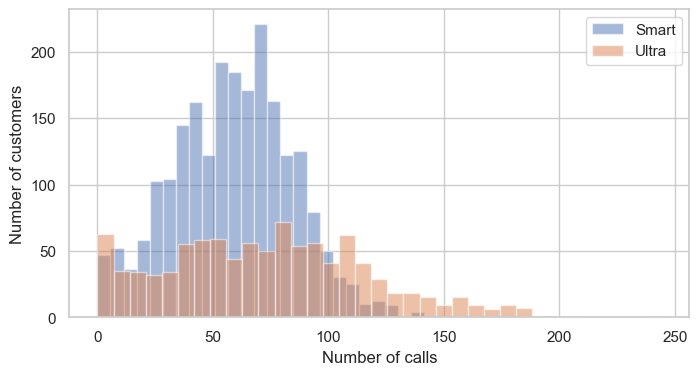

In [29]:
plt.figure(figsize=(8, 4))
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of customers')
plt.show()

**Conclusion**. There are significantly more Smart customers than Ultra customers. Most of the Smart users made 50-70 calls, while most of the Ultra customers made about 80-110 calls.

* Distribution of average call duration by tariff type and month.

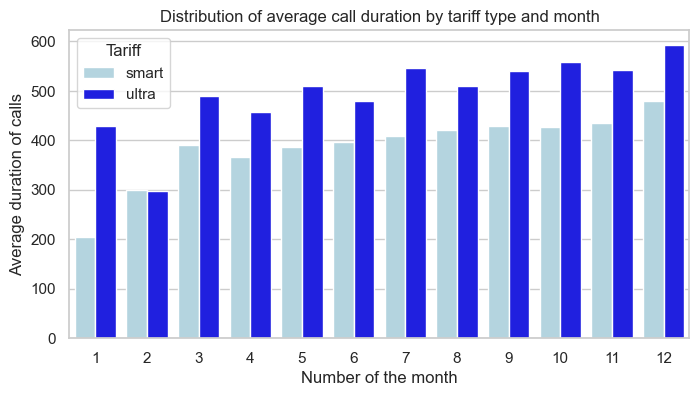

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

plt.title('Distribution of average call duration by tariff type and month')
plt.xlabel('Number of the month')
plt.ylabel('Average duration of calls')
plt.legend(title='Tariff')
plt.show()

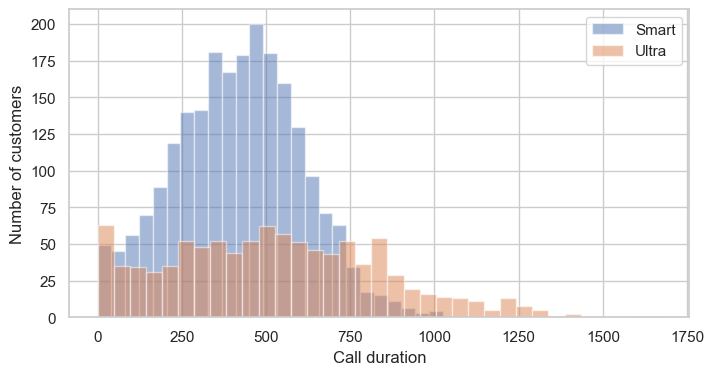

In [31]:
plt.figure(figsize=(8, 4))
user_behavior.groupby('tariff')['minutes'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Call duration')
plt.ylabel('Number of customers')
plt.show()

**Conclusion**. On average, Ultra subscribers talk longer than Smart users. Over time the average call duration increases for both tariffs. Users of the Ultra tariff usually stay under 3000 minutes included in the tariff package, while not all users of the Smart tariff manage to stay within the 500 minutes included in the tariff and start to use additional minutes.

* Distribution of average number of messages by tariff type and month

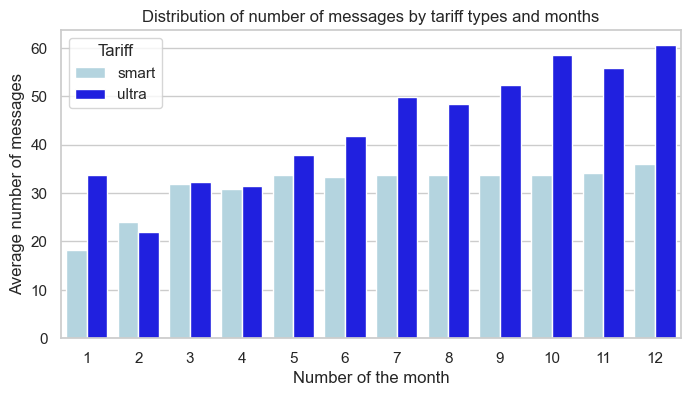

In [32]:
plt.figure(figsize=(8, 4))
sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

plt.title('Distribution of number of messages by tariff types and months')
plt.xlabel('Number of the month')
plt.ylabel('Average number of messages')
plt.legend(title='Tariff')
plt.show()

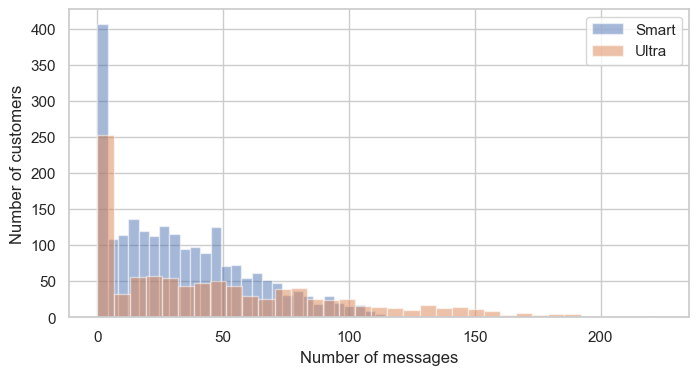

In [33]:
plt.figure(figsize=(8, 4))
user_behavior.groupby('tariff')['messages'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of messages')
plt.ylabel('Number of customers')
plt.show()

**Conclusion**. On average, Ultra tariff users send almost 20 more messages than Smart tariff users. The number of messages on both tariffs increases throughout the year. The trends in the number of messages sent are similar to the trends in call duration: Ultra tariff users tend to stay within the 1,000 messages included in the tariff package, while some Smart tariff users exceed the number of messages (50) included in the tariff and spend on additional messages for an additional fee.

* Distribution of average spent traffic by tariff type and month

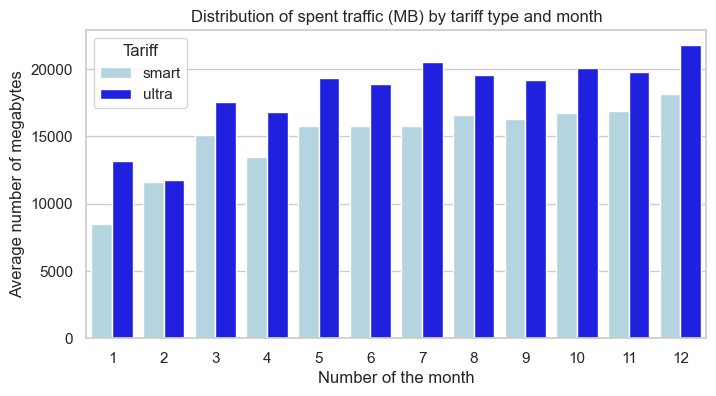

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])
plt.title('Distribution of spent traffic (MB) by tariff type and month')
plt.xlabel('Number of the month')
plt.ylabel('Average number of megabytes')
plt.legend(title='Tariff')
plt.show()

* Comparison of megabytes used between Smart and Ultra tariff users

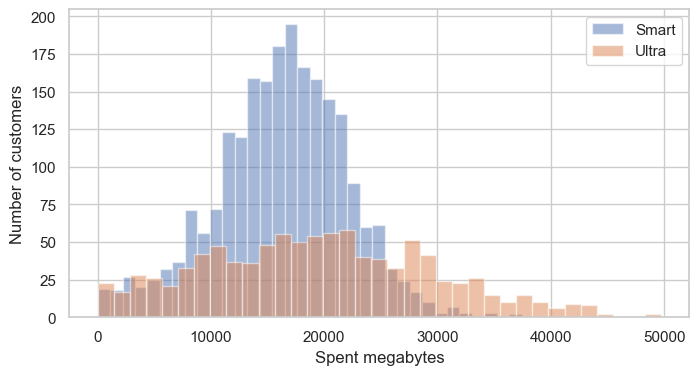

In [35]:
plt.figure(figsize=(8, 4))
user_behavior.groupby('tariff')['mb_used'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Spent megabytes')
plt.ylabel('Number of customers')
plt.show()

**Conclusion**. Users used the Internet the least in January, February and April. Smart subscribers mostly used 15-17 Gb, while Ultra subscribers mostly used 19-21 Gb.

* Distribution of average revenue by tariff type

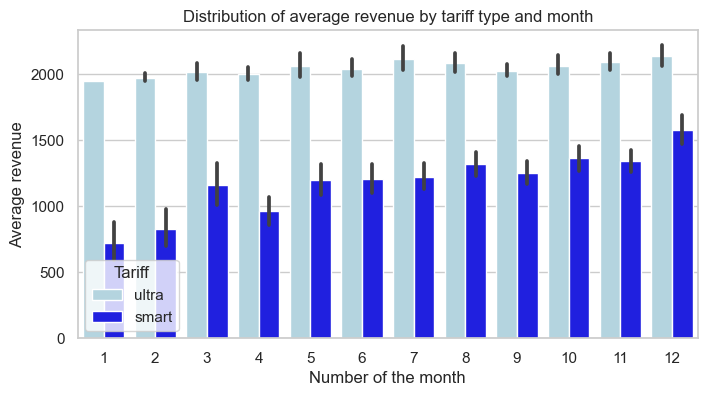

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(x='month',
            y='total_cost',
            hue="tariff",
            data=user_behavior,
            palette=['lightblue', 'blue'])
plt.title('Distribution of average revenue by tariff type and month')
plt.xlabel('Number of the month')
plt.ylabel('Average revenue')
plt.legend(title='Tariff')
plt.show()

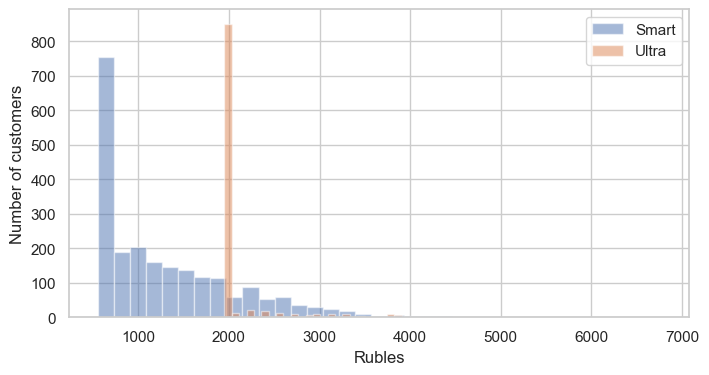

In [37]:
plt.figure(figsize=(8, 4))
user_behavior.groupby('tariff')['total_cost'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Rubles')
plt.ylabel('Number of customers')
plt.show()

**Conclusion**. On average, Smart tariff users exceed their package limits and purchase additional services, while Ultra users usually stay within their plan limits but sometimes pay for additional services, resulting in a small overpayment.

### Hypothesis testing

Hypothesis: The average revenue of Ultra and Smart tariff users differs;
```
H_0: Ultra users' revenue (total_cost) = Smart users' revenue (total_cost).
H_1: Ultra users' revenue (total_cost) ≠ Smart users' revenue (total_cost).
alpha = 0.05
```

In [38]:
# outputs the p-value to the screen 
# conditional statement with the output of the response string

total_cost_smart = user_behavior[user_behavior['tariff'] =='smart']['total_cost']
total_cost_ultra = user_behavior[user_behavior['tariff'] =='ultra']['total_cost']

results = st.ttest_ind(total_cost_smart, total_cost_ultra, equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print ('Rejecting the null hypothesis')
else:
    print ('It was not possible to reject the null hypothesis')

4.2606313931076085e-250
Rejecting the null hypothesis


**Вывод**. Был использован t-тест для независимых выборок с equal_var=False. Результаты показали, что p-value равно 4.26e-250, что намного меньше, чем выбранный уровень значимости alpha=0.05, поэтому нулевая гипотеза была отвергнута в пользу альтернативной гипотезы. Разница в средней выручке пользователей тарифов "Ультра" и "Смарт" статистически значима.

**Conclusion**. A t-test for independent samples with equal_var=False was used. The results showed that the p-value is 4.26e-250, which is much less than the chosen level of significance alpha=0.05, so the null hypothesis was rejected in favor of the alternative hypothesis. The difference in the average revenue of users of "Ultra" and "Smart" tariffs is statistically significant.

Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

Hypothesis testing: users from Moscow bring more revenue than users from other cities;

```
H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow``.
H_1: Proceeds (total_cost) of users from Moscow ≠ proceeds (total_cost) of users not from Moscow`.
alpha = 0.05
```

In [39]:
city_moscow = user_behavior[user_behavior['city'] == 'Москва']['total_cost']
city_other = user_behavior[user_behavior['city'] != 'Москва']['total_cost']


results = st.ttest_ind(city_moscow, city_other, equal_var=False)

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print ('Reject the null hypothesis')
else:
    print ('The null hypothesis could not be rejected')

0.5257376663729298
The null hypothesis could not be rejected


**Conclusion**. An independent samples t-test with equal_var=False was used. The results showed that the p-value is 0.53, which is greater than the chosen significance level alpha=0.05, so it was not possible to reject the null hypothesis that users from Moscow bring more revenue than users from other cities.

Let's look at the percentage of users on Smart and Ultra tariffs:

In [40]:
user_behavior.groupby('tariff')['user_id'].nunique() / user_behavior['user_id'].nunique() * 100

tariff
smart    70.281124
ultra    29.718876
Name: user_id, dtype: float64

Most customers use the Smart plan (70%). Now let's look at the average revenue per user for each plan.

In [41]:
user_behavior.groupby('tariff')['total_cost'].mean().round()

tariff
smart    1290.0
ultra    2070.0
Name: total_cost, dtype: float64

The average monthly revenue from Ultra tariff users was 2,070 RUB, 60% more than the average revenue from Smart tariff users (1,290 RUB).

### General conclusion

The following work was done in the course of the study.
1. General information about the data was examined.
2. The data was prepared for analysis:
    * transformed to the correct type;
    * expanded with calculated numbers of minutes spent, messages sent, megabytes spent by month for each user.
3.  Revenue was calculated and data analysis was performed. According to the results of the analysis, the following was found:
    * On average, Ultra subscribers talk longer than Smart subscribers. Ultra tariff users usually stay within 3,000 minutes included in the tariff package, while not all Smart tariff users are able to stay under 500 minutes included in the tariff package and use additional minutes as a result.
    * Ultra Rate subscribers usually stay within the 1,000 messages included in their tariff package, while some Smart Rate subscribers exceed the number of messages included in their tariff package (50) and pay for additionally sent messages.
    * In most cases, Smart plan subscribers use 15-17 Gb, while Ultra plan subscribers use 19-21 Gb.
    * The average monthly revenue from the Ultra tariff users was 2070 RUB and 1290 RUB for the Smart tariff users accordingly.
4. Two hypotheses were tested. 

Based on the results of the analysis and hypothesis testing, the following recommendations for the operator's promotional strategy could be made.

The difference in the average revenue from users on the Ultra and Smart tariffs is statistically significant, therefore we can pay more attention to the advertising of the Ultra tariff and promote it as a more premium and functional option.
It was not possible to reject the null hypothesis that users from Moscow generate more revenue than users from other cities. This may indicate that there is no need to direct additional advertising resources to Moscow, but rather to focus on other cities where there may also be great potential for increased revenues.